In [1]:
import numpy as np
import cv2
from PIL import Image

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


In [2]:
def load_input(path):
    return np.genfromtxt(path, dtype=str, delimiter=1)

In [3]:
def move_east(herd_set, grid):
    
    [rows,cols] = np.shape(grid)
    
    step = [0, 1]
    new_pos = set()
    new_grid = grid.copy()
    
    for s in herd_set:
        
        x = s[0]
        y = s[1]
        
        x_new = x
        y_new = (s[1]+step[1])%cols
        
        if grid[x_new,y_new] == '.':
            new_grid[x,y] = '.'
            new_grid[x_new,y_new] = '>'
            new_pos.add((x_new,y_new))
        else:
            new_pos.add((x,y))

    #print(new_grid)
    return new_pos, new_grid

def move_south(herd_set, grid):
    [rows,cols] = np.shape(grid)
    
    step = [1, 0]
    new_pos = set()
    new_grid = grid.copy()
    
    for s in herd_set:
        
        x = s[0]
        y = s[1]
        
        x_new = (s[0]+step[0])%rows
        y_new = y
        
        if grid[x_new,y_new] == '.':
            new_grid[x,y] = '.'
            new_grid[x_new,y_new] = 'v'
            new_pos.add((x_new,y_new))
        else:
            new_pos.add((x,y))

    #print(new_grid)
    return new_pos, new_grid


def step(grid):
    
    east = set()
    south = set()
    
    x,y = np.where(grid=='>')
    for i in range(len(x)):
        east.add((x[i],y[i]))
    
    x,y = np.where(grid=='v')
    for i in range(len(x)):
        south.add((x[i],y[i]))
    
    
    new_east, tmp_grid = move_east(east, grid)
    new_south, new_grid = move_south(south, tmp_grid)
    
    return new_grid
    

def grid2im(grid):
    image_g = np.zeros(np.shape(grid),dtype=np.uint8)+50
    
    image_g[np.where(grid=='>')] = 128
    image_g[np.where(grid=='v')] = 192
    
    image_g = np.array(Image.fromarray(image_g).resize([250,250],Image.BOX))
    image_c = cv2.applyColorMap(image_g, cv2.COLORMAP_DEEPGREEN)
    
    return image_c
    #plt.imshow(image_c)
    #plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    #plt.show()

In [4]:
data = load_input("day25_data_test.txt")

[rows,cols] = np.shape(data)
print(rows,cols)

9 10


In [5]:
print(data)

[['v' '.' '.' '.' '>' '>' '.' 'v' 'v' '>']
 ['.' 'v' 'v' '>' '>' '.' 'v' 'v' '.' '.']
 ['>' '>' '.' '>' 'v' '>' '.' '.' '.' 'v']
 ['>' '>' 'v' '>' '>' '.' '>' '.' 'v' '.']
 ['v' '>' 'v' '.' 'v' 'v' '.' 'v' '.' '.']
 ['>' '.' '>' '>' '.' '.' 'v' '.' '.' '.']
 ['.' 'v' 'v' '.' '.' '>' '.' '>' 'v' '.']
 ['v' '.' 'v' '.' '.' '>' '>' 'v' '.' 'v']
 ['.' '.' '.' '.' 'v' '.' '.' 'v' '.' '>']]


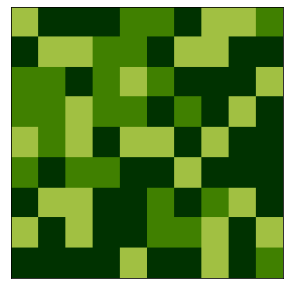

In [6]:
plt.imshow(grid2im(data))
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

In [7]:
south = set() # move (x+1, y)
east = set()  # move (x, y+1)

In [8]:
x,y = np.where(data=='v')

for i in range(len(x)):
    south.add((x[i],y[i]))
    
print(south)

{(4, 0), (1, 6), (0, 8), (6, 2), (7, 7), (6, 8), (4, 2), (4, 5), (5, 6), (0, 7), (2, 4), (1, 2), (6, 1), (7, 0), (7, 9), (3, 2), (4, 7), (4, 4), (3, 8), (8, 4), (0, 0), (8, 7), (1, 1), (2, 9), (1, 7), (7, 2)}


In [9]:
x,y = np.where(data=='>')

for i in range(len(x)):
    east.add((x[i],y[i]))
    
print(east)

{(3, 4), (3, 1), (8, 9), (0, 5), (2, 5), (1, 3), (6, 5), (3, 0), (3, 3), (5, 0), (3, 6), (5, 3), (0, 4), (2, 1), (6, 7), (7, 6), (4, 1), (5, 2), (0, 9), (2, 0), (1, 4), (2, 3), (7, 5)}


In [10]:
print(data)
print()
east, data = move_east(east,data)
print()
south, data = move_south(south,data)

[['v' '.' '.' '.' '>' '>' '.' 'v' 'v' '>']
 ['.' 'v' 'v' '>' '>' '.' 'v' 'v' '.' '.']
 ['>' '>' '.' '>' 'v' '>' '.' '.' '.' 'v']
 ['>' '>' 'v' '>' '>' '.' '>' '.' 'v' '.']
 ['v' '>' 'v' '.' 'v' 'v' '.' 'v' '.' '.']
 ['>' '.' '>' '>' '.' '.' 'v' '.' '.' '.']
 ['.' 'v' 'v' '.' '.' '>' '.' '>' 'v' '.']
 ['v' '.' 'v' '.' '.' '>' '>' 'v' '.' 'v']
 ['.' '.' '.' '.' 'v' '.' '.' 'v' '.' '>']]




In [11]:
data = load_input("day25_data_test.txt")

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('day_25_sea_cucumbers_short.mp4', fourcc, 20, (250,250), True)

count = 1
grid = data
while True:
    
    
    
    out.write(grid2im(grid))
    
    
    new_grid = step(grid)
    
    if (new_grid == grid).all():
        print(count)
        for _ in range(20):
            out.write(grid2im(grid))
        break
        
    else:
        grid = new_grid
        count += 1
    #print(count)
out.release()    
    

58


In [12]:
data = load_input("day25_data.txt")

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('day_25_sea_cucumbers_long.mp4', fourcc, 20, (250,250), True)

count = 1
grid = data
while True:
    
    
    
    out.write(grid2im(grid))
    
    
    new_grid = step(grid)
    
    if (new_grid == grid).all():
        print(count)
        for _ in range(20):
            out.write(grid2im(grid))
        break
        
    else:
        grid = new_grid
        count += 1
    #print(count)
out.release()    

419
